
### Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

### Problem Statement

#### Jamboree recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. To analyse which factors are important and interrelated among themselves. Also help predict one's chances of admission given the rest of the variables.

In [77]:
#loading the dataset

df = pd.read_csv(r"D:\Scaler Case study\Jamboree Education  Linear Regression -CS-7\Jamboree_Admission.txt")

In [78]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Analyzing basic metrics

In [79]:
df.shape #The dataset has 500 rows and 9 columns

(500, 9)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [81]:
#Checking data types of each column

df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [82]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [83]:
#Checking Stastical summary of the data

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Non-Graphical Analysis: Value counts and unique attributes

In [84]:
#Renaming some columns

df.columns = df.columns.str.strip() #Removing whitespace from column names
df.rename(columns={'University Rating':'University_Rating','GRE Score':'GRE_Score',
                   'TOEFL Score':'TOEFL_Score','Chance of Admit':'Chance_of_Admit'},inplace=True)

In [85]:
df.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [86]:
## Checking unique value and value counts of the columns

In [87]:
def dist_check(df, col_name):
  print("Unique values =", df[col_name].unique())
  print("Value counts :")
  print(df[col_name].value_counts())

In [88]:
column_list = ['University_Rating','GRE_Score', 'TOEFL_Score','SOP','CGPA','Research']
for col in column_list: 
  print(col, "-")
  dist_check(df, col)
  print("\n")

University_Rating -
Unique values = [4 3 2 5 1]
Value counts :
3    162
2    126
4    105
5     73
1     34
Name: University_Rating, dtype: int64


GRE_Score -
Unique values = [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
Value counts :
312    24
324    23
316    18
321    17
322    17
327    17
314    16
311    16
320    16
317    15
325    15
315    13
308    13
323    13
318    12
319    12
326    12
304    12
300    12
313    12
310    11
305    11
301    11
329    10
307    10
299    10
298    10
309     9
340     9
331     9
328     9
330     8
332     8
334     8
306     7
302     7
297     6
296     5
303     5
336     5
295     5
335     4
333     4
338     4
339     3
337     2
294     2
290     2
293     1
Name: GRE_Score, dtype: int64


TOEFL_Score -
Unique values = [118 107 104 110 103 115 109 101 102 108 106 111 112 105 

In [89]:
#Dropping the "Serial No." column so that our model does not build some understanding based on row numbers leading to wrong o/p.

df = df.drop(columns=['Serial No.'])

In [90]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Visual Analysis - Univariate & Bivariate

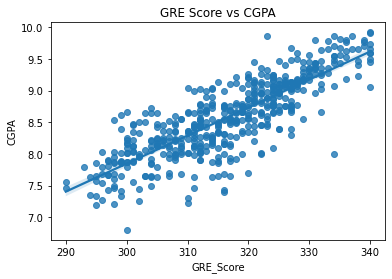

In [91]:
fig = sns.regplot(x="GRE_Score",y="CGPA",data=df)
plt.title("GRE Score vs CGPA")
plt.show()

#There is a postive coorelation between CGPA and GRE Score. Thus the relationship is linear.

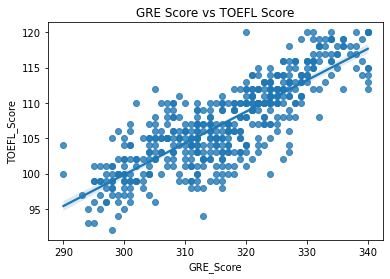

In [92]:
fig = sns.regplot(x="GRE_Score",y="TOEFL_Score",data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

#There is a postive coorelation between TOEFL and GRE Score.

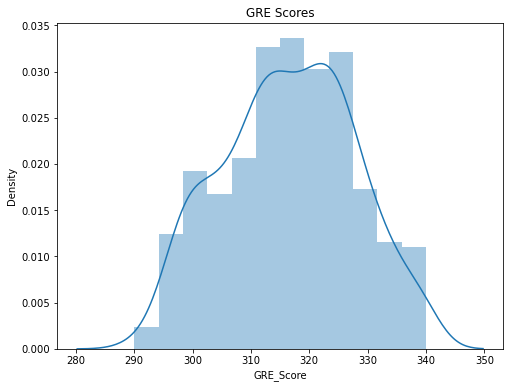

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['GRE_Score'],ax=ax)
plt.title("GRE Scores")
plt.show()

#Maximum GRE scores are falling between 310 to 325

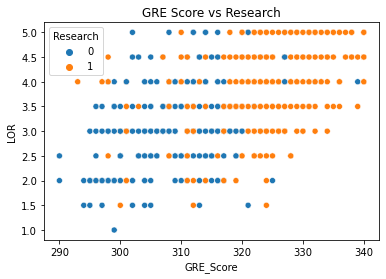

In [94]:
fig = sns.scatterplot(x="GRE_Score",y="LOR",hue="Research",data=df)
plt.title("GRE Score vs Research")
plt.show()

#Candidates who have high GRE score tend to have done Research as well.

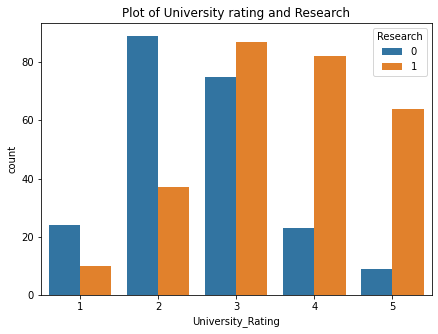

In [95]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(data=df,x='University_Rating',hue='Research',ax=ax)
plt.title("Plot of University rating and Research")
plt.show()

#Candidates having done 'Research' are applying to High rated universities as compared to students who has not done Research
#work.

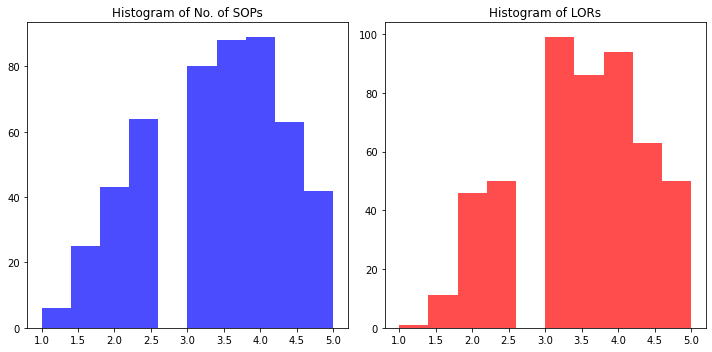

In [96]:
#Plotting histogram of SOP and LR

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(df['SOP'], bins=10, color='blue', alpha=0.7)
axes[0].set_title('Histogram of No. of SOPs')

axes[1].hist(df['LOR'], bins=10, color='red',alpha=0.7)
axes[1].set_title('Histogram of LORs')

plt.tight_layout()
plt.show()

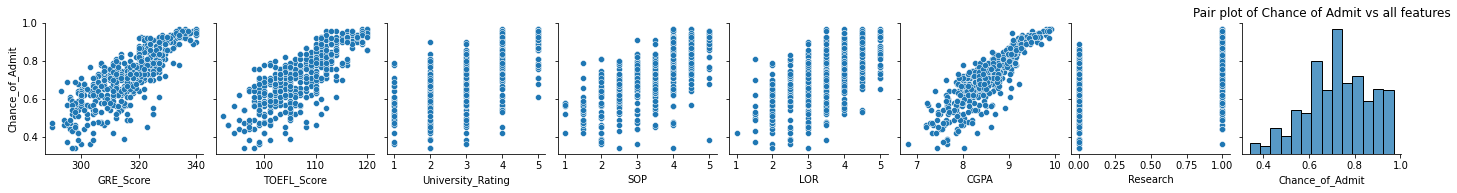

In [97]:
sns.pairplot(df,y_vars = ["Chance_of_Admit"])
plt.title("Pair plot of Chance of Admit vs all features")
plt.show()

#From the graph it seems University_Rating, SOP, LOR and Research are not much lineary dependent on target variable.

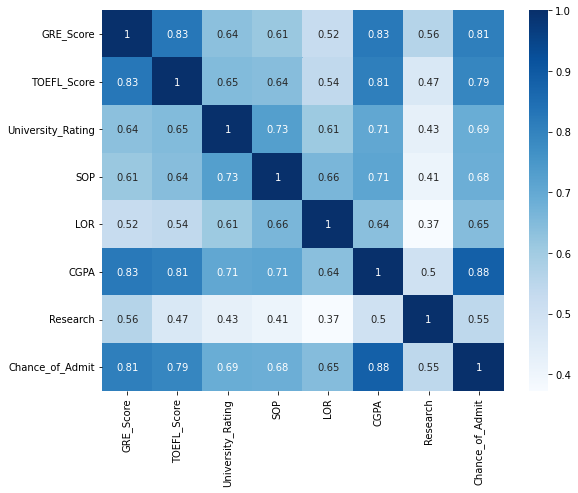

In [98]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr(), cmap="Blues", annot=True,ax=ax)
plt.show()

#### 1) We can infer that 'GRE' and 'CGPA' are most important factors which increases the chance of admit in an University.

#### 2) SOP, LOR, Research are less correlated compared to other features.

#### Pairplot to see linearity across features

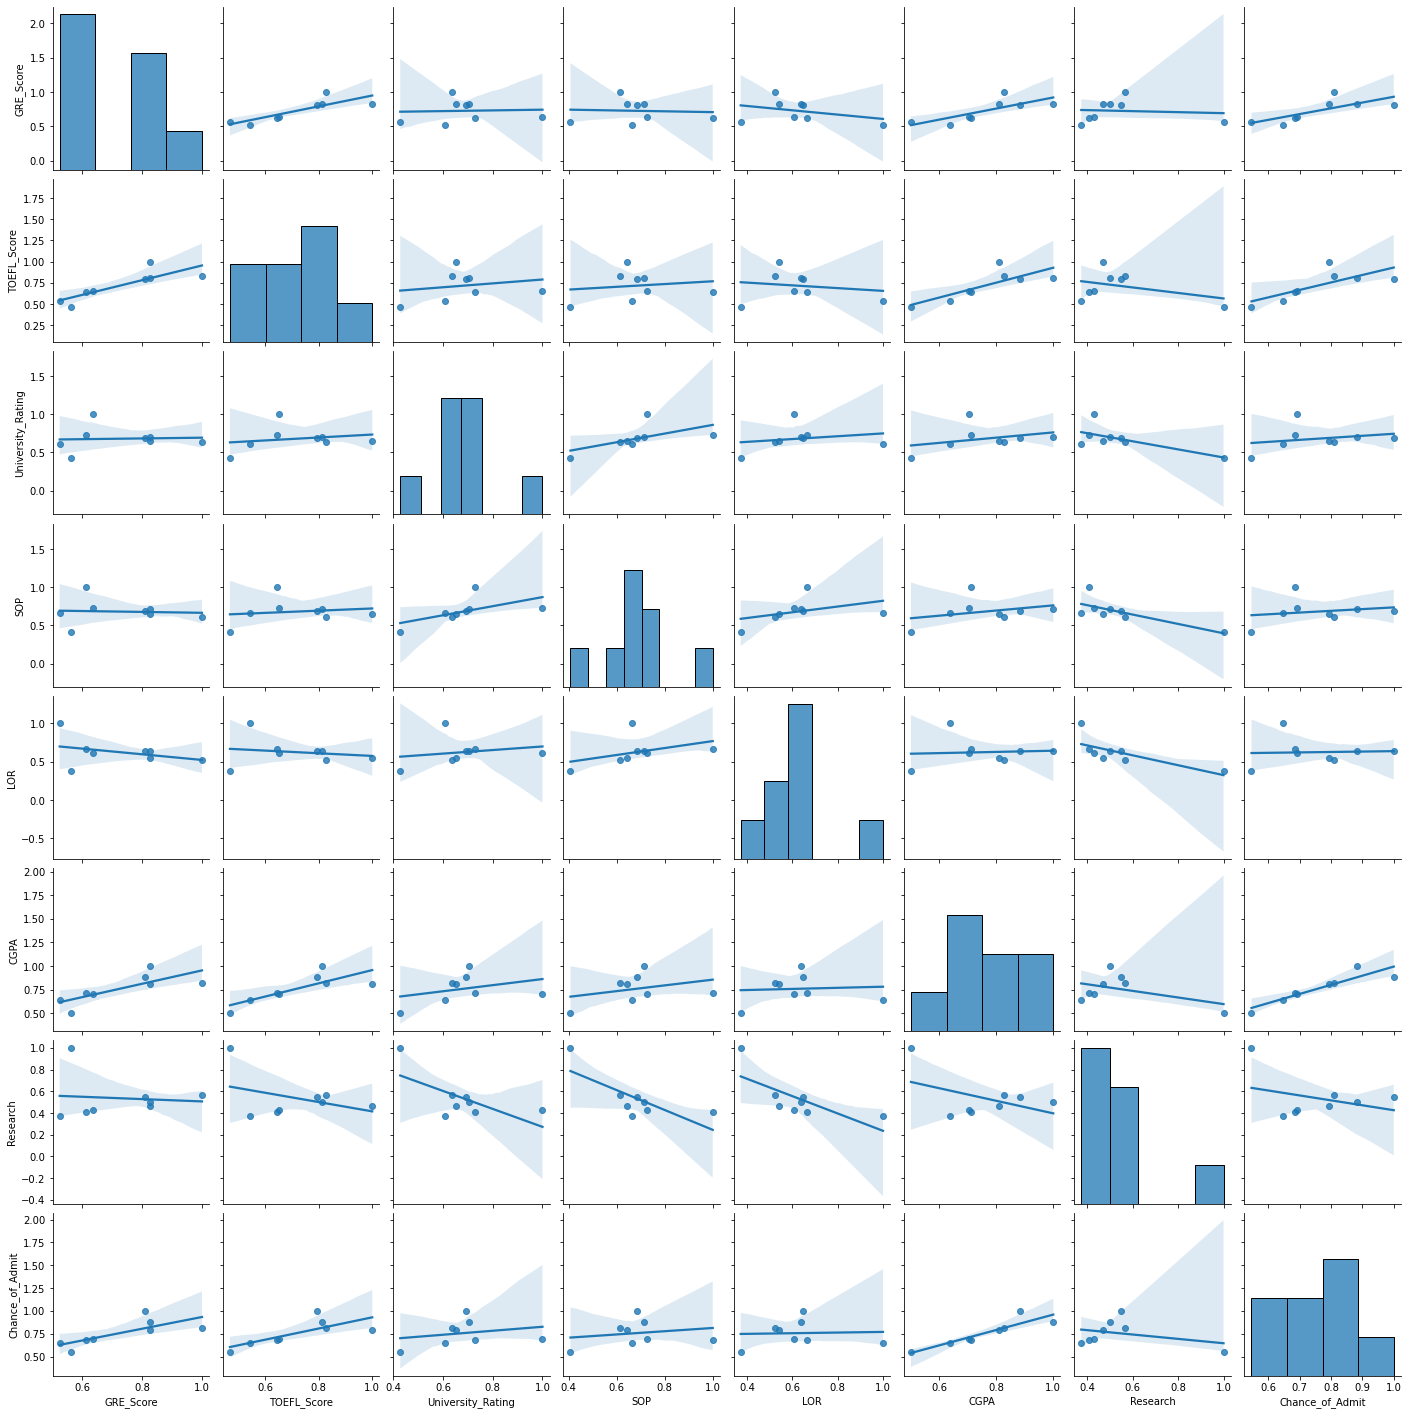

In [99]:
sns.pairplot(df.corr(),kind= 'reg')

## Data Preprocessing

#### Duplicate value check and missing value check

In [100]:
df.duplicated().sum() #There are no duplicates values present

0

In [101]:
print(df.isnull().sum())

#On checking the dataset we found that there are no null values in any of the columns.

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64


### Outlier check

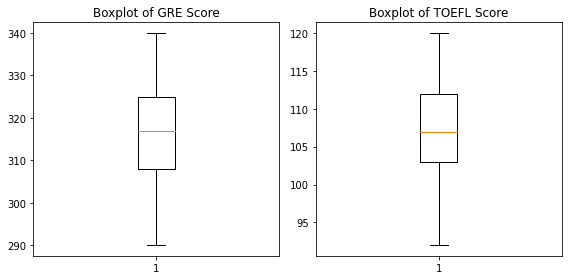

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].boxplot(data=df,x='GRE_Score')
axes[0].set_title('Boxplot of GRE Score')

axes[1].boxplot(data=df,x='TOEFL_Score')
axes[1].set_title('Boxplot of TOEFL Score')

plt.tight_layout()
plt.show()

#We can conclude that there are no outliers in GRE and TOEFL column

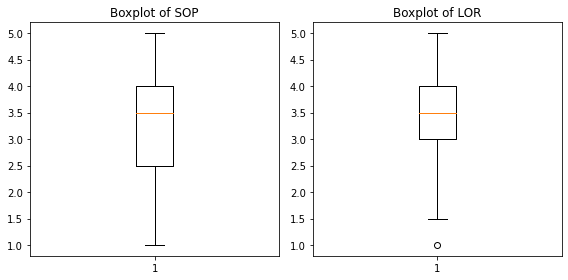

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].boxplot(data=df,x='SOP')
axes[0].set_title('Boxplot of SOP')

axes[1].boxplot(data=df,x='LOR')
axes[1].set_title('Boxplot of LOR')

plt.tight_layout()
plt.show()

#We can conclude that there are no outliers in SOP and not much in LOR column. Hence we will not remove them.

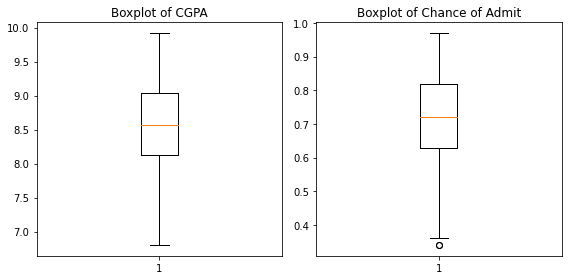

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].boxplot(data=df,x='CGPA')
axes[0].set_title('Boxplot of CGPA')

axes[1].boxplot(data=df,x='Chance_of_Admit')
axes[1].set_title('Boxplot of Chance of Admit')

plt.tight_layout()
plt.show()

#We can conclude that there are no outliers in CGPA and not much in Chance of Admit column. Hence we will not remove them.

##### From all the above graphs we can conclude there are not much significant amount of Outliers present.

### To check Linearity: Correlation with Target variable

In [105]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

GRE_Score


<Figure size 216x216 with 0 Axes>

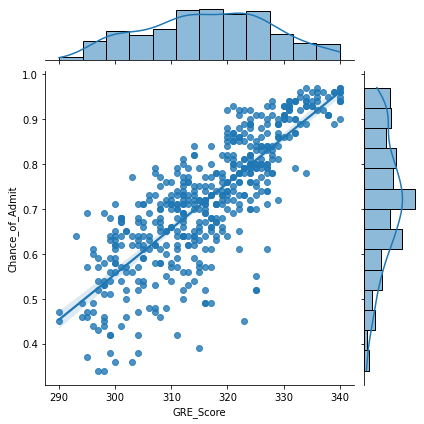

TOEFL_Score


<Figure size 216x216 with 0 Axes>

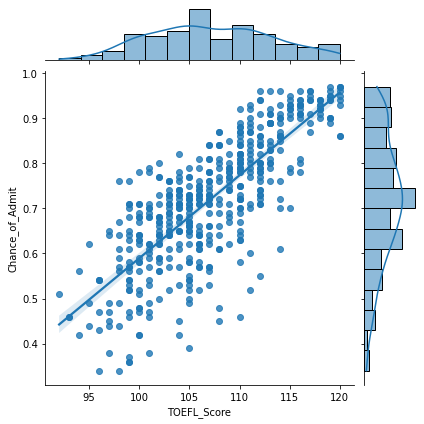

University_Rating


<Figure size 216x216 with 0 Axes>

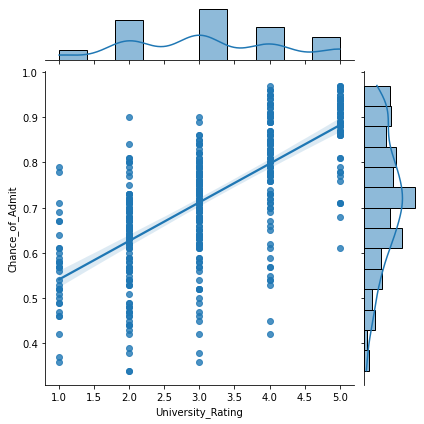

SOP


<Figure size 216x216 with 0 Axes>

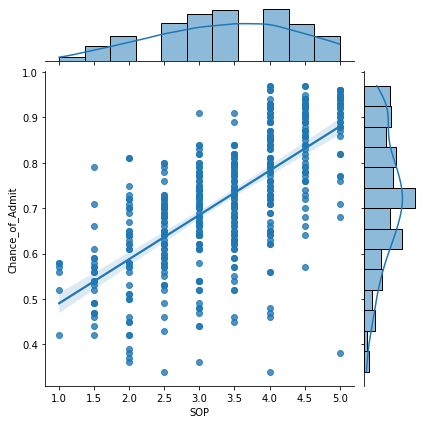

LOR


<Figure size 216x216 with 0 Axes>

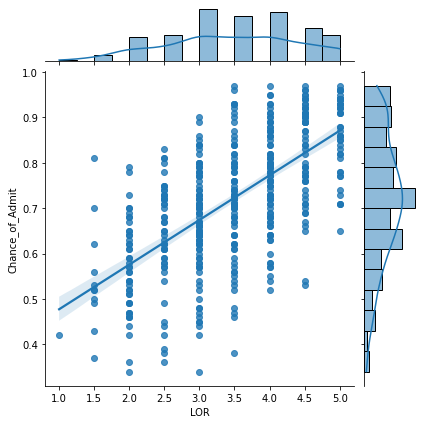

CGPA


<Figure size 216x216 with 0 Axes>

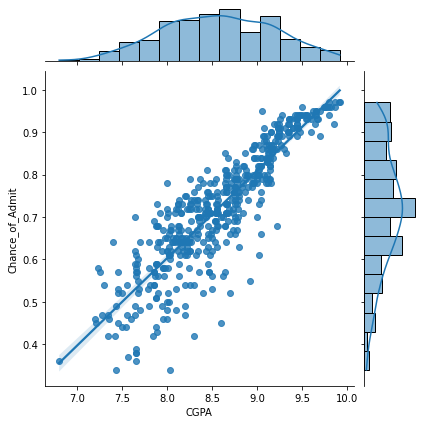

Research


<Figure size 216x216 with 0 Axes>

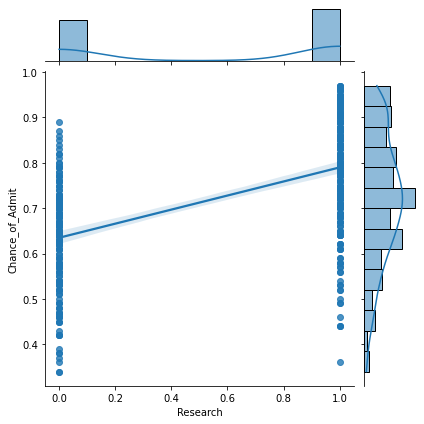

In [106]:
for col in df.columns[:-1]:
    print(col)
    plt.figure(figsize=(3,3))
    sns.jointplot(data=df,x=df[col],y=df["Chance_of_Admit"],kind="reg")
    plt.show()

### Model building and Model performance evaluation

In [149]:
X = df.drop(['Chance_of_Admit'],axis=1) #Input variable except for Target variable - Independent variables
y = df['Chance_of_Admit'].values.reshape(-1,1) #Target variable
y.shape,X.shape

((500, 1), (500, 7))

#### Scaling the data - to ensure units are same - Will use Standard Scaler

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X) #Standardizing the data

#### Splitting train and test data

In [151]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [165]:
X_train.shape, y_train.shape

((400, 7), (400, 1))

In [153]:
X_test.shape,y_test.shape

((100, 7), (100, 1))

In [154]:
y_train

array([[0.7 ],
       [0.67],
       [0.59],
       [0.36],
       [0.78],
       [0.44],
       [0.71],
       [0.71],
       [0.66],
       [0.64],
       [0.47],
       [0.84],
       [0.94],
       [0.76],
       [0.76],
       [0.71],
       [0.58],
       [0.63],
       [0.46],
       [0.77],
       [0.86],
       [0.49],
       [0.52],
       [0.92],
       [0.71],
       [0.58],
       [0.96],
       [0.79],
       [0.5 ],
       [0.86],
       [0.51],
       [0.44],
       [0.93],
       [0.96],
       [0.95],
       [0.81],
       [0.89],
       [0.71],
       [0.38],
       [0.61],
       [0.78],
       [0.87],
       [0.69],
       [0.56],
       [0.69],
       [0.73],
       [0.73],
       [0.42],
       [0.57],
       [0.95],
       [0.62],
       [0.47],
       [0.9 ],
       [0.48],
       [0.85],
       [0.77],
       [0.7 ],
       [0.86],
       [0.9 ],
       [0.56],
       [0.63],
       [0.73],
       [0.34],
       [0.8 ],
       [0.71],
       [0.71],
       [0.

In [163]:
X_train

array([[-0.57356322, -0.52536441, -0.09979274, ...,  0.01730621,
        -0.3416706 , -1.12815215],
       [ 0.1354148 ,  0.46216267, -1.85054249, ...,  0.01730621,
        -0.06031039,  0.88640526],
       [-1.45978576, -1.01912795, -0.09979274, ..., -1.06433187,
        -1.15265002, -1.12815215],
       ...,
       [ 0.75577058, -0.03160087, -0.09979274, ...,  0.01730621,
         0.88307384,  0.88640526],
       [ 0.84439283,  0.62675052,  1.65095702, ...,  0.55812525,
         1.08168105,  0.88640526],
       [-1.45978576, -0.36077656, -1.85054249, ..., -1.60515091,
        -1.28505482, -1.12815215]])

### Training the model

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### R2 Score on training data

In [115]:
model.score(X_train,y_train)

0.8215099192361265

#### R2 Score on test data

In [116]:
model.score(X_test,y_test)

0.8208741703103732

#### Checking Coefficient and Intercept of features

In [117]:
model.intercept_

array([0.72288132])

In [118]:
model.coef_

array([[0.02067476, 0.0192841 , 0.00700141, 0.00297506, 0.01333792,
        0.07051363, 0.00987303]])

In [119]:
dataframe = pd.DataFrame(model.coef_.reshape(1,-1),columns=df.columns[:-1])

In [120]:
dataframe["Intercept"] = model.intercept_
dataframe

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


In [121]:
LinearRegression_Model_coefs = dataframe
LinearRegression_Model_coefs

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


### Model performance evaluation

#### Checking Adjusted R2 Score

In [122]:
def adj_r2(R2score,n,d):
    return 1-(((1-R2score)*(n-1))/(n-d-1))

In [123]:
y_pred = model.predict(X_test)

#### Checking model statistics

In [124]:
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Mean Square Error:",mean_squared_error(y_test,y_pred))
print("Mean Root Mean square Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))
print("Adjusted R2 Score:",adj_r2(r2_score(y_test,y_pred),len(X),X.shape[1]))

Mean Absolute Error 0.040200193804157944
Mean Square Error: 0.003459098897136383
Mean Root Mean square Error: 0.05881410457650769
R2 Score: 0.8208741703103732
Adjusted R2 Score: 0.8183256320830818


### Model Regularization

#### Ridge regression

In [125]:
from sklearn.linear_model import Ridge #L2 regularization

In [126]:
R2_score_training = []
R2_score_test = []
lambda1 = 0
lambdas=[]
while lambda1 <= 10:
    lambdas.append(lambda1)
    RidgeModel = Ridge(lambda1)
    RidgeModel.fit(X_train,y_train)
    R2_train = RidgeModel.score(X_train,y_train)
    R2_test = RidgeModel.score(X_test,y_test)
    R2_score_training.append(R2_train)
    R2_score_training.append(R2_test)
    
    lambda1 += 0.01  

In [127]:
RidgeModel = Ridge(alpha = 0.01)
RidgeModel.fit(X_train,y_train)
R2_train = RidgeModel.score(X_train,y_train)
R2_test = RidgeModel.score(X_test,y_test)

In [128]:
RidgeModel.coef_

array([[0.02067678, 0.01928533, 0.00700222, 0.00297655, 0.01333837,
        0.07050714, 0.00987319]])

In [129]:
R2_train,R2_test

(0.821509918768668, 0.8208731518083686)

In [130]:
RidgeModel_coefs = pd.DataFrame(RidgeModel.coef_.reshape(1,-1),columns=df.columns[:-1])
RidgeModel_coefs["Intercept"] = RidgeModel.intercept_
RidgeModel_coefs

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020677,0.019285,0.007002,0.002977,0.013338,0.070507,0.009873,0.722881


In [131]:
LinearRegression_Model_coefs

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


In [132]:
y_pred = RidgeModel.predict(X_test)

print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred) ) 
print("Mean Square Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Square Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Scoer:",r2_score(y_test,y_pred))
print("Adjusted R2 score :", adj_r2(r2_score(y_test,y_pred),len(X),X.shape[1]))

Mean Absolute Error : 0.04020048022146991
Mean Square Error: 0.0034591185654285943
Root Mean Square Error: 0.05881427178354412
R2 Scoer: 0.8208731518083686
Adjusted R2 score : 0.8183245990901951


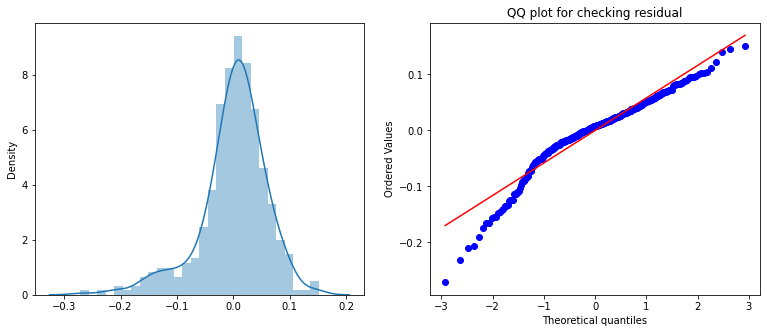

In [133]:
y_predicted = RidgeModel.predict(X_train)

residual = (y_train - y_predicted)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.distplot(residual)
plt.subplot(1,2,2)
stats.probplot(residual.reshape(-1,), plot = plt)
plt.title('QQ plot for checking residual')
plt.show()

#### Lasso regression

In [134]:
from sklearn.linear_model import Lasso #L1 regularization

In [135]:
R2_score_training = []
R2_score_test = []
lambda1 = 0
lambdas=[]
while lambda1 <= 10:
    lambdas.append(lambda1)
    LassoModel = Lasso(lambda1)
    LassoModel.fit(X_train,y_train)
    R2_train = LassoModel.score(X_train,y_train)
    R2_test = LassoModel.score(X_test,y_test)
    R2_score_training.append(R2_train)
    R2_score_training.append(R2_test)
    
    lambda1 += 0.01  

In [136]:
LassoModel = Lasso(alpha = 0.01)
LassoModel.fit(X_train,y_train)
R2_train = LassoModel.score(X_train,y_train)
R2_test = LassoModel.score(X_test,y_test)

In [137]:
R2_train,R2_test

(0.8135315610291831, 0.8036785160501803)

In [138]:
Lasso_Model_coefs = pd.DataFrame(LassoModel.coef_.reshape(1,-1),columns=df.columns[:-1])
Lasso_Model_coefs["Intercept"] = LassoModel.intercept_
Lasso_Model_coefs

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020205,0.01716,0.004806,0.001322,0.009013,0.071295,0.00389,0.722704


In [139]:
LinearRegression_Model_coefs

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


In [140]:
print(RidgeModel_coefs)

   GRE_Score  TOEFL_Score  University_Rating       SOP       LOR      CGPA  \
0   0.020677     0.019285           0.007002  0.002977  0.013338  0.070507   

   Research  Intercept  
0  0.009873   0.722881  


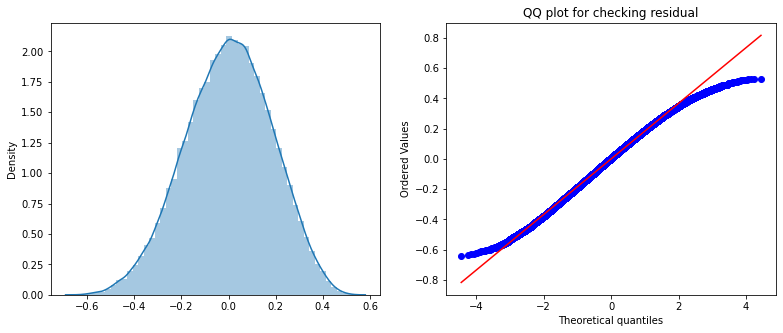

In [143]:
y_predicted = LassoModel.predict(X_train)

residual = (y_train - y_predicted)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.distplot(residual)
plt.subplot(1,2,2)
stats.probplot(residual.reshape(-1,), plot = plt)
plt.title('QQ plot for checking residual')
plt.show()

### Linear Regression using Statsmodel library

In [144]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.ravel(), X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          2.10e-142
Time:                        00:38:07   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7229      0.003    238.468      0.0

### Assumptions of the linear regression model

#### Multicollinearity check by VIF score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
columnNames = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research']
vif_data = pd.DataFrame()
vif_data['Features'] = columnNames
vif_data['VIF'] = [variance_inflation_factor(X_train,i) for i in range(len(columnNames))]
vif_data

### Mean of residuals 

In [169]:
print("Mean Root Mean square Error:",np.sqrt(mean_squared_error(y_test,y_pred)))

#Root mean sqaure is close to zero.

Mean Root Mean square Error: 0.05881427178354412


In [251]:
y_pred = model.predict(X_train)

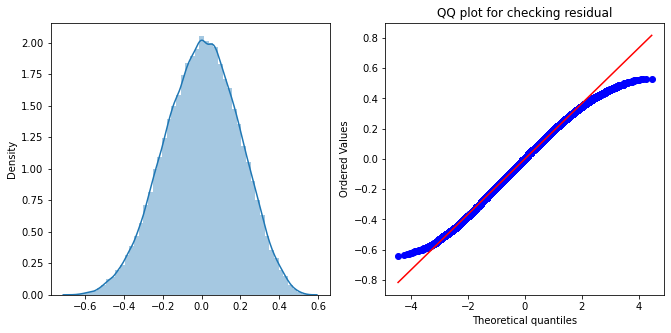

In [250]:
error = (y_train - y_pred)
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.distplot(error)
plt.subplot(1,2,2)
stats.probplot(residual.reshape(-1,), plot = plt)
plt.title('QQ plot for checking residual')
plt.show()

#### Linearity of variables 

In [ ]:
sns.pairplot(df,y_vars = ["Chance_of_Admit"])
plt.title("Pair plot of Chance of Admit vs all features")
plt.show()

#### Test for Homoscedasticity

In [253]:
#To check this, we will plot the scatterplot of our predicted value vs error

y_pred = model.predict(X_train)
errors = y_pred - y_train

In [ ]:
sns.scatterplot(x=y_pred.reshape(-1,), y=errors.reshape(-1,))
plt.xlabel('y_pred')
plt.ylabel('errors')
plt.axhline(y=0)
plt.title("y_pred vs errors for checking homoscedasticity")
plt.show()

## Normality of residuals

In [ ]:
import seaborn as sns

sns.histplot(errors)
plt.xlabel("Residuals")
plt.title("Histogram of residuals")
plt.show()

#### We can see the residuals are forming a bell shaped distribution

#### Plotting Chance_of_Admit

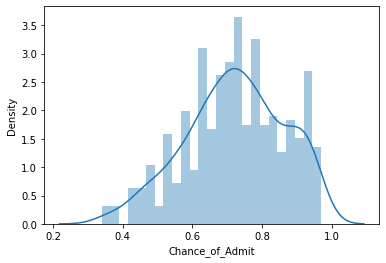

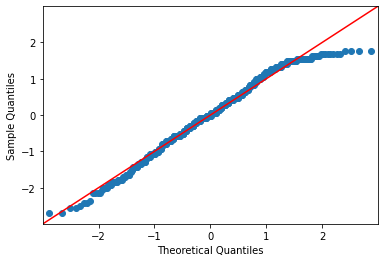

In [249]:
sns.distplot(df["Chance_of_Admit"],bins = 25)
sm.qqplot(df["Chance_of_Admit"],fit=True, line="45")
plt.show()

#### Plotting graph of GRE_Score

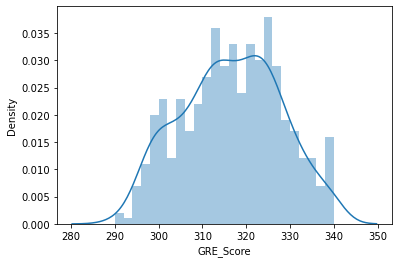

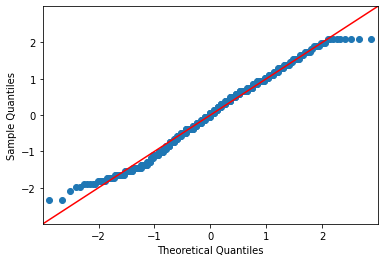

In [248]:
sns.distplot(df["GRE_Score"],bins = 25)
sm.qqplot(df["GRE_Score"],fit=True, line="45")
plt.show()

#### Plotting graph of TOEFL_Score

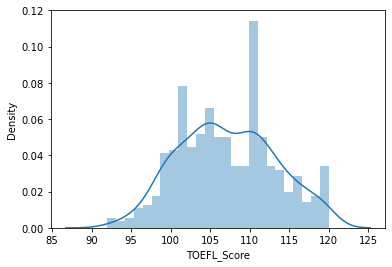

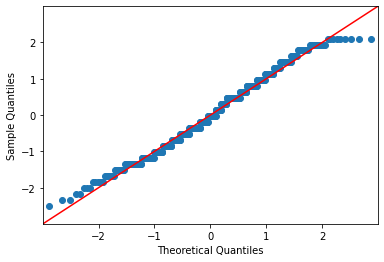

In [247]:
sns.distplot(df["TOEFL_Score"],bins = 25)
sm.qqplot(df["TOEFL_Score"],fit=True, line="45")
plt.show()

#### Plotting graph of CGPA

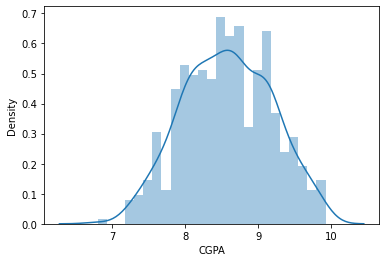

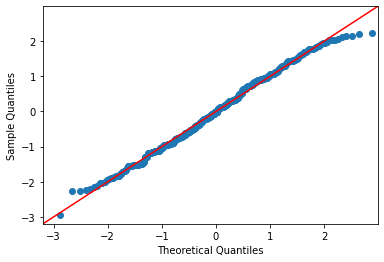

In [246]:
sns.distplot(df["CGPA"],bins = 25)
sm.qqplot(df["CGPA"],fit=True, line="45")
plt.show()

#### From the above graphs we can see that all the plots are showing a bell shaped distribution. Also all the QQ plots are almost on the line.

### Actionable Insights

#### 1) From the data, we can see all features are numeric and continuous. Also, no null and duplicate values are present in data.

#### 2) The range of GRE scores and TOEFL scores in the data is 290-340 and 92-120 respectively.

#### 3)Mean of GRE score is 316, TOEFL score is 107, University rating is 3.11, SOP is 3.37, LOR is 3.48, CGPA is 8.57 and Research is 0.56.

#### 4) After performing outliers test no amount of significant outliers are present in the data.

#### 5) From correlation heatmap, GRE Score and CGPA is highly correlated with Chance of Admit in University.

#### 6) Univerity rating, SOP, LOR and Research are comparatively less correlated with Chance of Admit compared to GRE and CGPA.

#### 7)From the graph we saw that, students who have done 'Research' are opting for Universities having high rating.

#### 8) After plotting Linear plots, we saw features like University_Rating, SOP, LOR and Research are not much linearly dependent on target variable.

#### 9) VIF of all features were less than 5 which indicated that the features were not much multi-collinear among themselves.

#### 10) Root mean square error of output and prediction was close to zero.

#### 11) Graph of all features are showing near perfect bell shaped curve which says that features are normally distributed. QQ plot also showed the same charactersitic.

### Recommendations

#### 1) Since GRE score is the most important ascpect, Jamboree Education can try to train their student for this exam to increase theirchance of admission in University.

#### 2) Jamboree should market about this new feature as much as possible so that large data can be collected. With these data model can be changed and more accuracy can be achieved.

#### 3) To further improve the chance of admission, Jamboree can help student write good SOP and resume.

#### 4) A live tracker can be placed on the website so that students can enter their marks on the go which shows their chance of admission. Also, new tips/recommendations must be shared based on theor inputs.

#### 5) Jamboree can organize timely seminars or webinars to educate students based on the importance of GRE scores and other features which hold more weight-age for the admission.